In [232]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.decomposition import PCA

%matplotlib inline

# Install
---

In [225]:
# pip install spacy
# python -m spacy download en_core_web_lg

# Introduction
---

In [203]:
# mention about using the movie case study, nlp on movie description, cluster, feature engineering

In [204]:
nlp = spacy.load("en_core_web_lg")

In [205]:
# Process whole documents
text = ("When Sebastian Thrun started working on self-driving cars at "
        "Google in 2007, few people outside of the company took him "
        "seriously. “I can tell you very senior CEOs of major American "
        "car companies would shake my hand and turn away because I wasn’t "
        "worth talking to,” said Thrun, in an interview with Recode earlier "
        "this week.")
doc = nlp(text)

# Analyze syntax
print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])
print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])

# Find named entities, phrases and concepts
for entity in doc.ents:
    print(entity.text, entity.label_)

Noun phrases: ['Sebastian Thrun', 'self-driving cars', 'Google', 'few people', 'the company', 'him', 'I', 'you', 'very senior CEOs', 'major American car companies', 'my hand', 'I', 'Thrun', 'an interview', 'Recode']
Verbs: ['start', 'work', 'drive', 'take', 'can', 'tell', 'would', 'shake', 'turn', 'be', 'talk', 'say']
Sebastian Thrun PERSON
Google ORG
2007 DATE
American NORP
Thrun PERSON
Recode ORG
earlier this week DATE


# Details
---

In [206]:
doc = "The Trump administration may concede to a Chinese proposal that would give less protection for U.S. pharmaceutical products than they receive at home, according to people familiar with the matter, a move that could draw opposition from the American drug industry."

In [207]:
doc = nlp(doc)

In [208]:
displacy.render(doc, style='ent',jupyter=True)

In [209]:
# displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

In [210]:
doc.ents

(Trump, Chinese, U.S., American)

In [211]:
list(doc.noun_chunks)

[The Trump administration,
 a Chinese proposal,
 less protection,
 U.S. pharmaceutical products,
 they,
 home,
 people,
 the matter,
 a move,
 opposition,
 the American drug industry]

# Vectors
---

In [212]:
doc.vector[:5]

array([-0.09464369,  0.11310662, -0.06536292, -0.02065734,  0.00804621],
      dtype=float32)

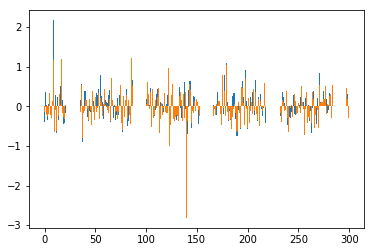

In [229]:
plt.bar(range(300), nlp('dog').vector)
plt.bar(range(300), nlp('cat').vector)
plt.show()

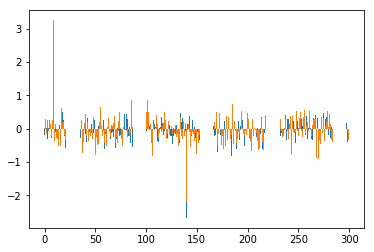

In [231]:
plt.bar(range(300), nlp('man').vector)
plt.bar(range(300), nlp('woman').vector)
plt.show()

In [255]:
words = ['car', 'truck', 'dragon', 'data', 'man', 'woman' , 'lion']

In [256]:
wordvecs = [nlp(w).vector for w in words]

In [257]:
wordvecs[0][:50]

array([ 0.20987  ,  0.46481  , -0.24238  , -0.065751 ,  0.60856  ,
       -0.34698  , -0.25331  , -0.4259   , -0.22277  ,  2.2913   ,
       -0.33853  ,  0.23275  , -0.27511  ,  0.24064  , -1.0697   ,
       -0.26978  , -0.80733  ,  1.8698   ,  0.45562  , -0.14469  ,
        0.016246 , -0.35473  ,  0.76152  , -0.068589 ,  0.012156 ,
        0.009052 ,  0.11131  , -0.30746  ,  0.24168  ,  0.114    ,
        0.43952  , -0.66594  , -0.073198 ,  0.80566  ,  0.11748  ,
       -0.38758  ,  0.10691  ,  0.33697  , -0.13188  ,  0.19364  ,
        0.55553  , -0.34029  ,  0.17059  ,  0.40736  , -0.1615   ,
        0.070302 ,  0.067772 , -0.81763  ,  0.30645  , -0.0099862],
      dtype=float32)

In [258]:
pca = PCA(n_components=2)

In [259]:
pca.fit(wordvecs)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [260]:
word_vecs_2d = pca.transform(wordvecs)

In [261]:
word_vecs_2d

array([[-3.60490889, -2.17251924],
       [-3.29184586, -2.23537041],
       [ 3.74153122,  1.13084426],
       [-3.05529396,  5.86323048],
       [ 1.30088455, -1.61388457],
       [ 1.46028511, -1.9837761 ],
       [ 3.44934783,  1.01147557]])

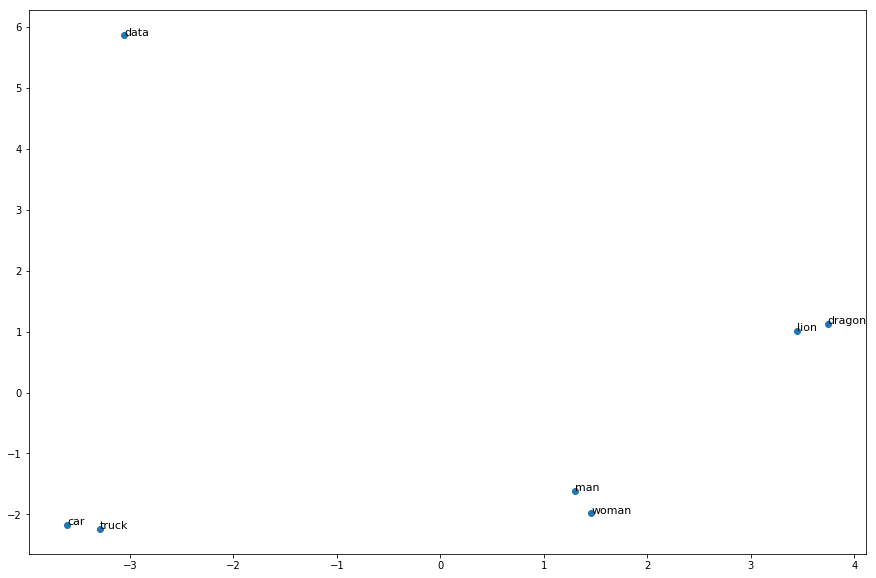

In [262]:
plt.figure(figsize=(15,10))
plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1])
for word, coord in zip(words, word_vecs_2d):
    x, y = coord
    plt.text(x, y, word, size= 11)
plt.show()

# Similarity
---

In [263]:
nlp('banana').similarity(nlp('apple'))

0.5831844567891399

In [264]:
nlp('dog').similarity(nlp('apple'))

0.2633902481063797

In [265]:
nlp('dog').similarity(nlp('cat'))

0.8016854705531046

In [266]:
nlp('dog').similarity(nlp('lion'))

0.4742449314321914

In [267]:
nlp('king').similarity(nlp('queen'))

0.7252610345406867

In [268]:
nlp('man').similarity(nlp('woman'))

0.7401744538491297

# Collection
----

In [269]:
texts = [
    'the cat, Peter, ran fast in the house',
    'sue is at college in a science class',
    'the dog, Molly, like to run in the yard',
    'frank is studying to become a doctor',
    'alice got a great score on her exam'
]

In [270]:
docs = [nlp(t) for t in texts]

In [271]:
for a, b in combinations(docs, 2):
    print(a.similarity(b), 'A:', a, 'B:', b)

0.7291278209851049 A: the cat, Peter, ran fast in the house B: sue is at college in a science class
0.925217321960435 A: the cat, Peter, ran fast in the house B: the dog, Molly, like to run in the yard
0.734807815001369 A: the cat, Peter, ran fast in the house B: frank is studying to become a doctor
0.7434369455525393 A: the cat, Peter, ran fast in the house B: alice got a great score on her exam
0.7431156486783654 A: sue is at college in a science class B: the dog, Molly, like to run in the yard
0.8292664758383241 A: sue is at college in a science class B: frank is studying to become a doctor
0.7587409084666407 A: sue is at college in a science class B: alice got a great score on her exam
0.7410866016904087 A: the dog, Molly, like to run in the yard B: frank is studying to become a doctor
0.7393402578512476 A: the dog, Molly, like to run in the yard B: alice got a great score on her exam
0.7763615175274904 A: frank is studying to become a doctor B: alice got a great score on her exam


# Clustering
---

In [272]:
vecs = [d.vector for d in docs]

In [273]:
km = KMeans(n_clusters=2).fit(vecs)

In [274]:
km.labels_

array([1, 0, 1, 0, 0], dtype=int32)

# Fin
---